<a href="https://colab.research.google.com/github/huaijiangzhu/summer_ml/blob/master/day2/lab_robot_arm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Lab*: Multiple Linear Regression for Robot Arm Calibration



In this lab, we will illustrate the use of multiple linear regression for calibrating robot control.  In addition understanding the concepts in the multivariable linear regression demo (with Boston housing data), you will see how to use multiple linear regression for time series data -- an important concept in dynamical systems such as robotics.

The robot data for the lab is taken from the TU Dortmund's Multiple Link Robot Arms Project. As part of the project, they have created an excellent public dataset: [MERIt](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html#h3MERIt) -- A Multi-Elastic-Link Robot Identification Dataset that can be used for understanding robot dynamics.  The data is from a three link robot:

<img src="https://botzeit.de/wp-content/uploads/2020/01/TUDORBild.png" height="200" width="200">

You can find some [videos](https://www.youtube.com/watch?v=kJPuenyxeps&list=PL1h7jWhj9f_V4MPzf-bNOnI7YzaxArKkb) on YouTube for this robot.

**We will focus on predicting the current draw into one of the joints as a function of the robot motion.  Such models are essential in predicting the overall robot power consumption.  Several other models could also be used.**

#### Load and Visualize the Data
First, import the modules we will need.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

The full MERIt dataset can be obtained from the [MERIt site](http://www.rst.e-technik.tu-dortmund.de/cms/en/research/robotics/TUDOR_engl/index.html#h3MERIt).  But, this dataset is large. Included in this repository are two of the ten experiments.  Each experiments corresonds to 80 seconds of recorded motion.  

We are going to use the following file:
* [robot_arm.csv](https://raw.githubusercontent.com/huaijiangzhu/summer_ml/master/day2/robot_arm.csv) 

Below, we have supplied the column headers in the `names` array.  


In [ ]:
names =[
    't',                                  # Time (secs)
    'q1', 'q2', 'q3',                     # Joint angle   (rads)
    'dq1', 'dq2', 'dq3',                  # Joint velocity (rads/sec)
    'I1', 'I2', 'I3',                     # Motor current (A)
    'eps21', 'eps22', 'eps31', 'eps32',   # Strain gauge measurements ($\mu$m /m )
    'ddq1', 'ddq2', 'ddq3'                # Joint accelerations (rad/sec^2)
]


# TODO 
df = pd.read_csv('robot_arm.csv', 
                 header=None, names=names, delim_whitespace=False, na_values='?')

Print the first six lines of the pandas dataframe and manually check that they match the first rows of the csv file.

In [ ]:
# TODO
df.head(5)

,t,q1,q2,q3,dq1,dq2,dq3,I1,I2,I3,eps21,eps22,eps31,eps32,ddq1,ddq2,ddq3
0,0.00,-0.000007,2.4958,-1.1345,-7.882100e-21,-4.940656e-321,3.913100e-29,-0.081623,-0.40812,-0.30609,-269.25,-113.20,3.5918,1.57860,-9.904900e-19,-6.210306e-319,4.917400e-27
1,0.01,-0.000007,2.4958,-1.1345,-2.258200e-21,-4.940656e-321,2.626200e-31,-0.037411,-0.37241,-0.26698,-270.91,-116.05,1.4585,-1.73980,4.248100e-19,-1.766878e-319,-1.381100e-27
2,0.02,-0.000007,2.4958,-1.1345,-6.469800e-22,-4.940656e-321,1.762500e-33,-0.066319,-0.40302,-0.31459,-269.25,-112.97,3.5918,0.86753,3.233800e-19,-4.990557e-320,-4.117300e-28
3,0.03,-0.000007,2.4958,-1.1345,-1.853600e-22,-4.940656e-321,1.182800e-35,-0.068020,-0.43703,-0.28398,-269.97,-114.39,1.6956,-0.08059,1.500500e-19,-1.394253e-320,-1.173100e-28
4,0.04,-0.000007,2.4958,-1.1345,-5.310600e-23,-4.940656e-321,-5.270900e-03,-0.052715,-0.40472,-0.30779,-269.97,-114.15,3.1177,0.86753,5.932400e-20,-3.581976e-321,-3.770800e-01


From the dataframe `df`, extract the *time* values into a vector `t` and extract `I2`, the *current* into the second joint.  Place the *current* in a vector `y`. Plot `y` vs. `t`.   Label the axes with the units.

Text(0, 0.5, 'current / A')

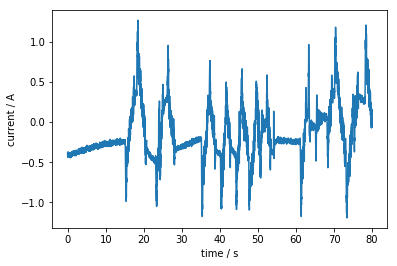

In [ ]:
# TODO

y = df['I2'].values
t = df['t'].values
plt.plot(t, y)
plt.xlabel('time / s')
plt.ylabel('current / A')

Let's use all the samples from the dataset that we need to train our model with:

* `y`:  A vector of all the samples from the `I2` column
* `X`:  A matrix of the data with the columns:  `['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']`

In [ ]:
# TODO


y = df['I2'].values
X = df[['q2','dq2','eps21', 'eps22', 'eps31', 'eps32','ddq2']].values

#### Fit a Linear Model

Import linear_model from sklearn.

Use the `sklearn.linear_model` module to create a `LinearRegression` class `regr`.

In [ ]:
# Create linear regression object

# TODO
from sklearn import linear_model

regr = linear_model.LinearRegression()

Train the model on the our data.

In [ ]:
# TODO
regr.fit(X, y)

LinearRegression()

Using the trained model, compute, `y_pred`, the predicted *current*.  Plot `y_pred` vs. time `t`.  On the same plot, plot the actual *current* `ytrain` vs. time `t`.  Create a legend for the plot.

Text(0, 0.5, 'current / A')

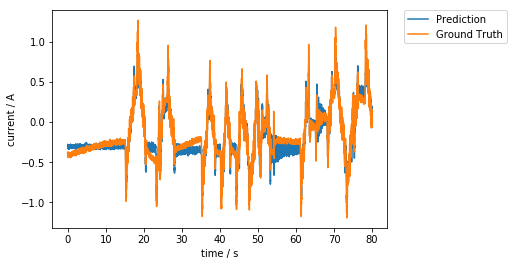

In [ ]:
# TODO

yhat = regr.predict(X)
plt.plot(t, yhat, label='Prediction')
plt.plot(t, y, label='Ground Truth')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('time / s')
plt.ylabel('current / A')

#### Goodness of the fit

Compute the MSE for your model

In [ ]:
# TODO
MSE = np.mean((y - yhat)**2)
print('MSE: {}'.format(MSE))

MSE: 0.010936466882766276
